## With some data in hand, logisitic regression has been implimented after pre-processing 

#### Library Importing: First, the relevant libraries are imported

In [ ]:
!pip install matplotlib==3.4.3
!pip install  numpy==1.21.5
!pip install  pandas==1.3.5
!pip install scikit_learn==1.0.2
!pip install seaborn==0.11.2
!pip install torch==1.10.2
!pip install torchvision==0.11.3


In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### Data Importing: CSV file is uploaded using pandas library

In [4]:
#reading data
df = pd.read_csv("../Input/data.csv")

#### Data Exploration: dimension of the data is seen and the oputput column is checked to see that it is continous or  discrete. In this case we have discrete so classification algortithms should be applied.

In [5]:
df.head(5)  # Visualizing some of the rows of our data 

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [6]:
df = df.drop(["year", "customer_id", "phone_no"], axis=1)

In [7]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [8]:
print(df.shape)         # Lookiing the shape of the data
print(df.columns)       # Looking how many columns data has
df.dtypes               # Looing the type of data each column consists of

(2000, 13)
Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')


gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

##### Null Value Treatment: If we have null values then we need to work on that before feeding it to our model

In [9]:
df.describe(include="all")

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,1976,2000.00000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
unique,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1053,NaN,NaN,1802,1430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.69050,99.750000,NaN,NaN,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,NaN,10.20641,39.755386,NaN,NaN,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,NaN,18.00000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,32.00000,73.000000,NaN,NaN,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,NaN,37.00000,99.000000,NaN,NaN,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,NaN,44.00000,127.000000,NaN,NaN,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000


In [10]:
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [11]:
final_data = df.dropna()         # Dropping the null values
final_data.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [12]:
final_data.shape

(1918, 13)

In [13]:
final_data.isnull().sum()        #Looking the total null values again just in case 

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

#####  Data Sampling:   Let us sample the data as our data is highly imbalanced. Upsampling and Downsampling has been used for minority and majority class of the output. Finally the data is concatanated for futhur processing


In [14]:
final_data["churn"].value_counts()       
# let us see how many data is there in each class for deciding the sampling data number

0.0    1665
1.0     253
Name: churn, dtype: int64

#### Data Spliting:  first we need to split the dataframe into separate classes before sampling  

In [15]:
df_majority = final_data[final_data['churn']==0] #class 0
df_minority = final_data[final_data['churn']==1] #class 1

In [16]:
df_minority["churn"]

2       1.0
18      1.0
22      1.0
24      1.0
26      1.0
       ... 
1926    1.0
1936    1.0
1940    1.0
1959    1.0
1999    1.0
Name: churn, Length: 253, dtype: float64

In [17]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=900, random_state=123) #upsampling minority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=900, random_state=123) #downsampling majority class

#### Data Concatation:  Concatanating the dataframe after upsampling and downsampling 

In [18]:
#concanating both upsampled and downsampled class
df2 = pd.concat([df_majority_downsampled, df_minority_upsampled])

##### Lets now check again the distribution of the oputut class after sampling

In [19]:
df2["churn"].value_counts()

0.0    900
1.0    900
Name: churn, dtype: int64

#### Encoding Catagoricals:  We need to encode the categorical variables before feeding it to the model

In [20]:
df2[['gender', 'multi_screen', 'mail_subscribed']]

,gender,multi_screen,mail_subscribed
1813,Male,yes,no
1362,Male,no,no
389,Female,no,no
1203,Male,no,no
1710,Male,no,no
...,...,...,...
1759,Male,no,no
845,Male,no,yes
602,Female,yes,no
22,Female,no,no


In [21]:
#label encoding categorical variables
label_encoder = preprocessing.LabelEncoder()
df2['gender']= label_encoder.fit_transform(df2['gender'])
df2['multi_screen']= label_encoder.fit_transform(df2['multi_screen'])
df2['mail_subscribed']= label_encoder.fit_transform(df2['mail_subscribed'])

In [22]:
df2.head(4)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1813,1,35,148,1,0,222.30,8.6,25.19,62,3,3.0,2,0.0
1362,1,42,98,0,0,241.50,12.1,27.37,113,4,4.0,4,0.0
389,0,39,56,0,0,379.80,4.4,43.04,133,4,2.0,1,0.0
1203,1,42,37,0,0,350.55,12.0,39.73,101,2,4.0,2,0.0


#### Let us use all the independent column for feeding the model for training by keeping it into separate dataframe

In [23]:
# x = df2.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14]].values  
# X = pd.DataFrame(x)

In [24]:
#indenpendent variable 
X = df2.iloc[:,:-1]

In [25]:
X

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
1813,1,35,148,1,0,222.30,8.6,25.19,62,3,3.0,2
1362,1,42,98,0,0,241.50,12.1,27.37,113,4,4.0,4
389,0,39,56,0,0,379.80,4.4,43.04,133,4,2.0,1
1203,1,42,37,0,0,350.55,12.0,39.73,101,2,4.0,2
1710,1,44,63,0,0,246.75,11.2,27.97,97,2,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1,34,89,0,0,455.85,5.3,51.66,89,3,2.0,1
845,1,37,122,0,1,262.35,13.5,29.73,116,3,4.0,1
602,0,61,88,1,0,352.65,7.2,39.97,76,2,2.0,4
22,0,45,76,0,0,395.10,11.4,44.78,101,5,4.0,1


#### This X will be fed to the model to learn params 

In [26]:
X.head(5)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
1813,1,35,148,1,0,222.30,8.6,25.19,62,3,3.0,2
1362,1,42,98,0,0,241.50,12.1,27.37,113,4,4.0,4
389,0,39,56,0,0,379.80,4.4,43.04,133,4,2.0,1
1203,1,42,37,0,0,350.55,12.0,39.73,101,2,4.0,2
1710,1,44,63,0,0,246.75,11.2,27.97,97,2,4.0,0


In [27]:
#scaling the data
sc = StandardScaler()         # Bringing the mean to 0 and variance to 1, so as to have a non-noisy optimization
X = sc.fit_transform(X)
X = sc.transform(X)

In [28]:
X

array([[ 0.914526  , -3.64278642, -2.49377785, ..., -1.91821933,
        -4.66177364, -1.11056583],
       [ 0.914526  , -3.58230119, -2.52651659, ..., -1.77079908,
        -3.03689902, -0.34254207],
       [-3.08881506, -3.60822343, -2.55401713, ..., -1.77079908,
        -6.28664826, -1.49457771],
       ...,
       [-3.08881506, -3.41812701, -2.53306434, ..., -2.06563959,
        -6.28664826, -0.34254207],
       [-3.08881506, -3.55637895, -2.54092164, ..., -1.62337882,
        -3.03689902, -1.49457771],
       [-3.08881506, -3.59094194, -2.53830254, ..., -1.18111806,
        -6.28664826, -1.87858958]])

#### Data Visualization: Its a good practice to visualize the plots so as to get an idea of data distribution. Here, dark dot is representing that the data belongs to  churn 1 and light color dot belongs to churn 0

In [29]:
df3 = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [30]:
df3

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1813,Male,35,148,yes,no,222.30,8.6,25.19,62,3,3.0,2,0.0
1362,Male,42,98,no,no,241.50,12.1,27.37,113,4,4.0,4,0.0
389,Female,39,56,no,no,379.80,4.4,43.04,133,4,2.0,1,0.0
1203,Male,42,37,no,no,350.55,12.0,39.73,101,2,4.0,2,0.0
1710,Male,44,63,no,no,246.75,11.2,27.97,97,2,4.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,Male,34,89,no,no,455.85,5.3,51.66,89,3,2.0,1,1.0
845,Male,37,122,no,yes,262.35,13.5,29.73,116,3,4.0,1,1.0
602,Female,61,88,yes,no,352.65,7.2,39.97,76,2,2.0,4,1.0
22,Female,45,76,no,no,395.10,11.4,44.78,101,5,4.0,1,1.0


In [31]:
df2 = df2.sample(frac=1).reset_index(drop=True)

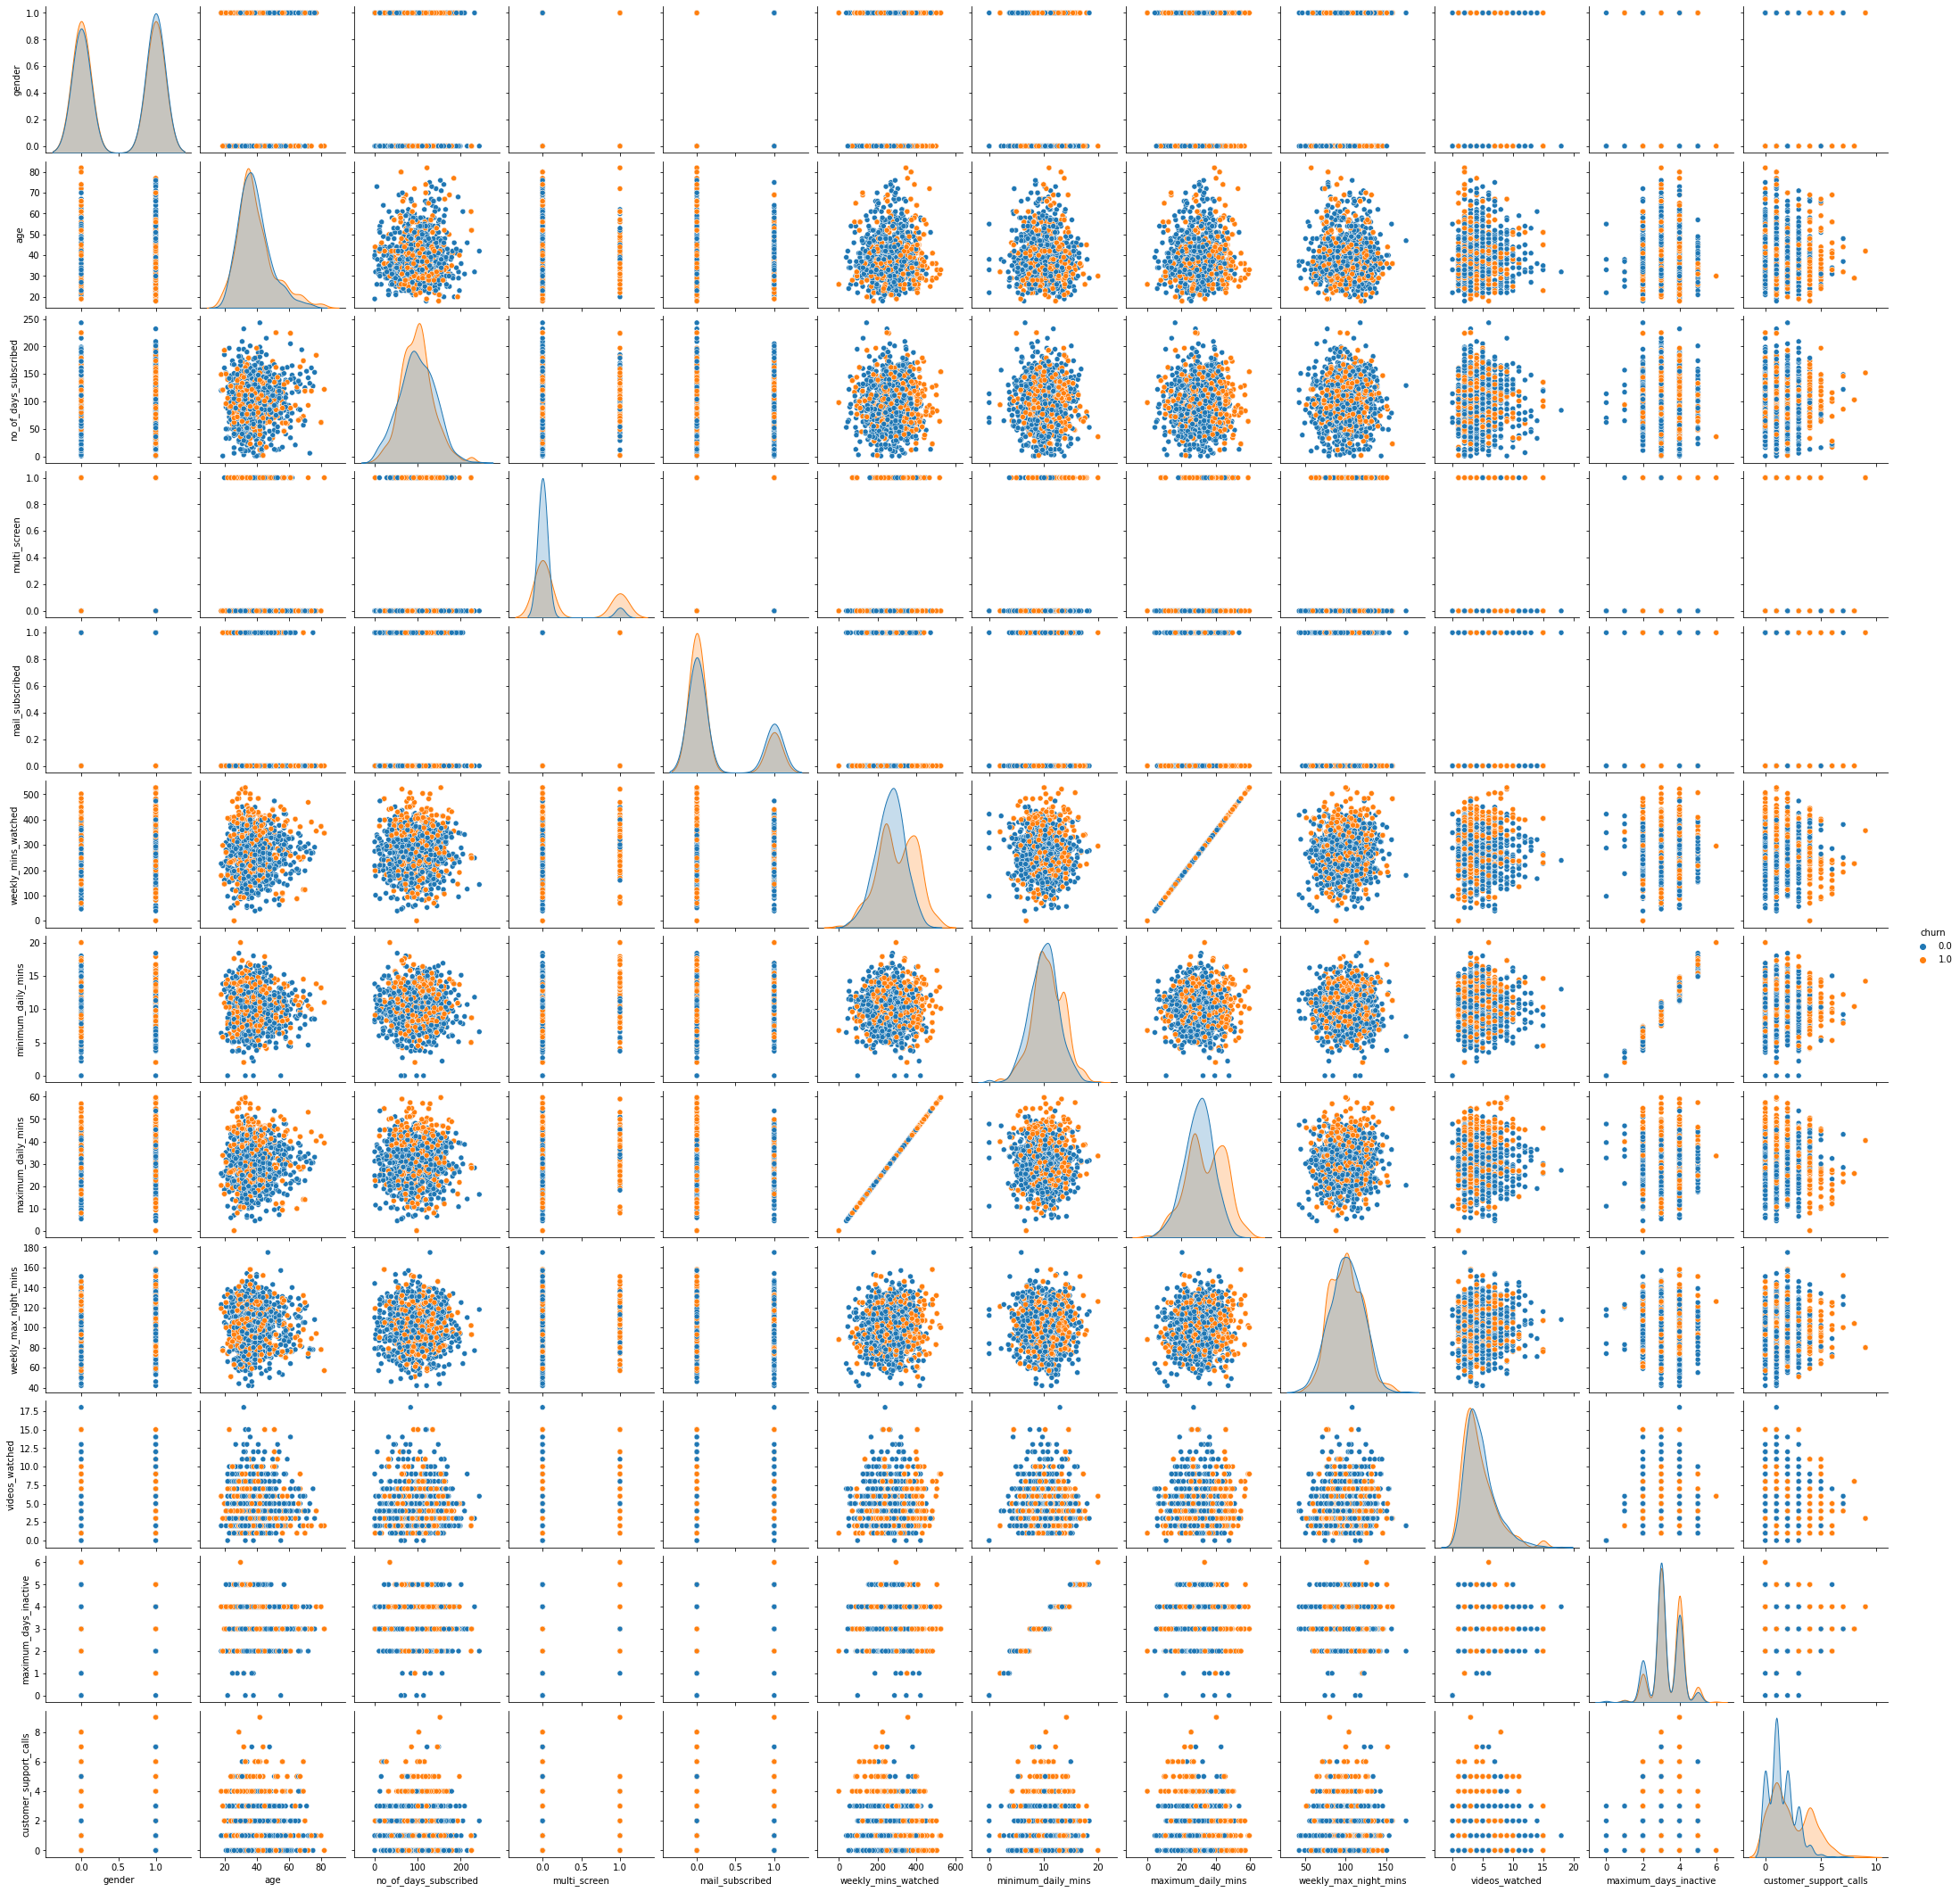

In [32]:
#pairplot visulization
sns.pairplot(df2,hue="churn")

In [33]:
n_samples, n_features = X.shape

#### Keeping the output column in a separate dataframe

In [34]:
#output column
Y = df2["churn"]

#### Data Splitting: The data is processesed so now we can split the data in train and test so as to train the model with training data and test it later from testing data

In [35]:
import sklearn
from sklearn.model_selection import train_test_split

In [36]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify = Y)

In [37]:
print((y_train == 1).sum())
print((y_train == 0).sum())

630
630


In [38]:
print(type(X_train))
print(type(X_test))
print(type(y_train.values))
print(type(y_test.values))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Now we will convert all of them to the tensor as PyTorch works on Tensor

In [39]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

In [40]:
y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

#### Making output vector Y as a column vector for matrix multiplications

In [41]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

### Model Building: Creating Logistic Regression model in Pytorch


#### Logistic Regression is a Linear model so we will use Pytorch's [nn.linear] module which is used for performing linear operations  for making a linear model and then we will pass the data to sigmoid function which separates a binary data in two parts using probability.

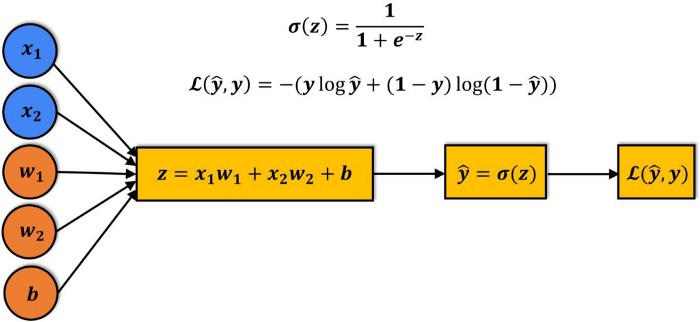

In [42]:
#logistic regression class
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    #sugmoid transformation of the input 
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [43]:
lr = LogisticRegression(n_features)

#### Model Compiling: Let us define the number epochs and the learning rate we want our model for training. As the data is binary so we will use Binary Cross Entropy as the loss function that will be used for the optimization of the model using ADAM optimizer.
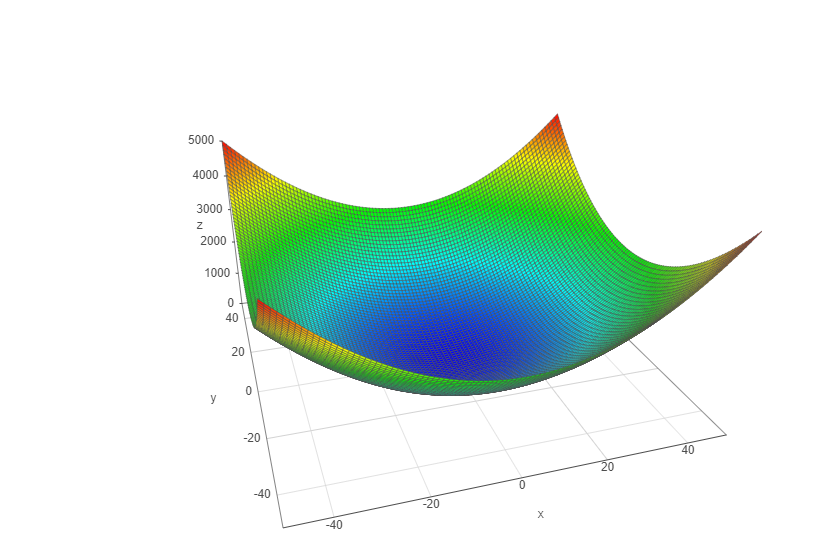

In [44]:
num_epochs = 500                                        
# Traning the model for large number of epochs to see better results  
learning_rate = 0.01                               
criterion = nn.BCELoss()                                
# We are working on lgistic regression so using Binary Cross Entropy
optimizer = torch.optim.SGD(lr.parameters(), lr=learning_rate)      
# Using ADAM optimizer to find local minima   

#### Visualizing the training process

In [45]:
for epoch in range(num_epochs):
    y_pred = lr(X_train)
    loss = criterion(y_pred, y_train)             
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 20 == 0:                                         
        # printing loss values on every 10 epochs to keep track
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 20, loss = 0.7184
epoch: 40, loss = 0.7107
epoch: 60, loss = 0.7055
epoch: 80, loss = 0.7020
epoch: 100, loss = 0.6995
epoch: 120, loss = 0.6978
epoch: 140, loss = 0.6966
epoch: 160, loss = 0.6957
epoch: 180, loss = 0.6950
epoch: 200, loss = 0.6945
epoch: 220, loss = 0.6940
epoch: 240, loss = 0.6937
epoch: 260, loss = 0.6934
epoch: 280, loss = 0.6931
epoch: 300, loss = 0.6929
epoch: 320, loss = 0.6927
epoch: 340, loss = 0.6925
epoch: 360, loss = 0.6923
epoch: 380, loss = 0.6922
epoch: 400, loss = 0.6921
epoch: 420, loss = 0.6919
epoch: 440, loss = 0.6918
epoch: 460, loss = 0.6917
epoch: 480, loss = 0.6916
epoch: 500, loss = 0.6916


#### Model Accuracy: Let us finally see the model accuracy

In [46]:
with torch.no_grad():
    y_predicted = lr(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.4889


#### Looking other Metrics: We can also see the precision, recall, and F1-score using classification report

In [47]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_cls))

              precision    recall  f1-score   support

         0.0       0.49      0.46      0.47       270
         1.0       0.49      0.52      0.51       270

    accuracy                           0.49       540
   macro avg       0.49      0.49      0.49       540
weighted avg       0.49      0.49      0.49       540



####  Visualizing Confusion Matrix 
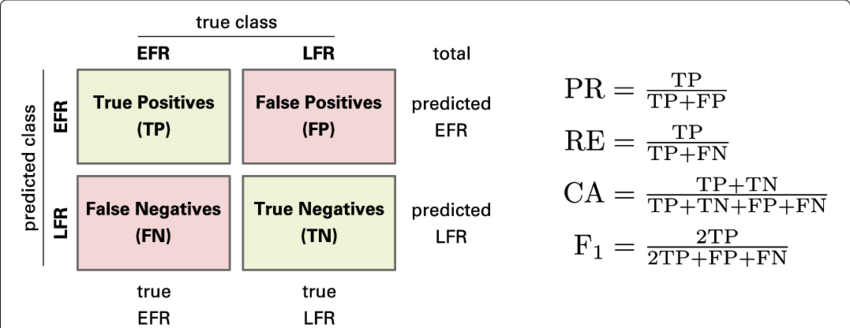

In [48]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted_cls)
print(confusion_matrix)

[[123 147]
 [129 141]]
